<a href="https://colab.research.google.com/github/martydom/why-do-customer-churn/blob/main/Devashish_Bose_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Conclusions**

> Day 1:
*   14.49% of Customers Left
*   State isn't a good parameter to determine the Churn, so we have to consider a composite feature containing State and Area Code.
*   Charges doesn't differ for different Customers. Although, charges differ during different time of days.
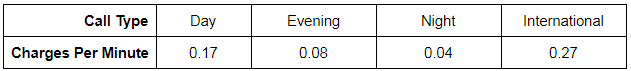
* Although, Charges can't be the reason why customer leaves, but we can draw an average correlation of total charges for every customer. And hence we can find the effictive charges per minute for customer.
* It has also been observed that Customers who Churn generally have more Customer Service Calls than those who stay.
* The Number of days after which most of the customers churn is approximately 105.


> Day 2:
* Iterating through each feature and checking for outliers and see how the outliers affect oue data.
* We need to filter the dataframe with these state codes and try to figure out what's wrong with our features in these particular area codes.
* Filtered Outliers for day calls and night calls

> Day 3:
* Found a way to plot boolean data
* Transform int call plan, voice mail and churn into numeric representation.
* Plot Each Categorical data against the churn and see how the datas affect churn.



# **Code Part**

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
work_dir = '/content/drive/My Drive/AlmaBetter/Module 2/Week 1/'
file_path = 'telecom_churn.csv'
df = pd.read_csv(work_dir+file_path)

In [161]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [162]:
df[df["International plan"]=='Yes']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3309,VT,100,408,Yes,No,0,219.4,112,37.30,225.7,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
3317,SD,163,415,Yes,No,0,197.2,90,33.52,188.5,113,16.02,211.1,94,9.50,7.8,8,2.11,1,False
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True


In [163]:
df[(df["International plan"]=='No')&(df["Churn"]==True)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,AR,76,408,No,No,0,107.3,140,18.24,238.2,133,20.25,271.8,116,12.23,10.0,3,2.70,4,True
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,True
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [164]:
df["State + Arcode"] = df.apply(lambda x : x['State'] + str(x["Area code"]) ,axis=1)

In [165]:
df['Effective Charges Per Min'] = df.apply(lambda x: (x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'])/(x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes']),axis=1)

In [166]:
df['Total calls'] = df.apply(lambda x: x['Total day calls']+x['Total night calls']+x['Total eve calls']+x['Total intl calls'],axis=1 )

In [167]:
churned_df = df[df['Churn']==True]

In [168]:
retend_df = df[df['Churn']==False]

In [169]:
retend_df.groupby('State')['State'].count().sort_values(ascending = False)

State
WV    96
AL    72
VA    72
WI    71
MN    69
NY    68
OH    68
WY    68
OR    67
VT    65
ID    64
CT    62
UT    62
IN    62
AZ    60
RI    59
MI    57
NC    57
KS    57
CO    57
NM    56
NE    56
ND    56
MO    56
FL    55
MT    54
TX    54
MA    54
MD    53
IL    53
DE    52
OK    52
SD    52
WA    52
NV    52
MS    51
KY    51
HI    50
NJ    50
ME    49
DC    49
AK    49
TN    48
LA    47
NH    47
GA    46
SC    46
AR    44
IA    41
PA    37
CA    25
Name: State, dtype: int64

In [170]:
churned_df.groupby('State')['State'].count().sort_values(ascending = True)

State
AK     3
IA     3
HI     3
AZ     4
LA     4
NE     5
VA     5
TN     5
DC     5
IL     5
NM     6
RI     6
ND     6
WI     7
MO     7
AL     8
GA     8
PA     8
KY     8
FL     8
SD     8
VT     8
OK     9
NH     9
WY     9
CA     9
CO     9
DE     9
ID     9
IN     9
WV    10
UT    10
OH    10
AR    11
OR    11
MA    11
NC    11
CT    12
KS    13
ME    13
NV    14
SC    14
WA    14
MT    14
MS    14
MN    15
NY    15
MI    16
MD    17
NJ    18
TX    18
Name: State, dtype: int64

In [171]:
sns.set(rc={'figure.figsize':(15,10)})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


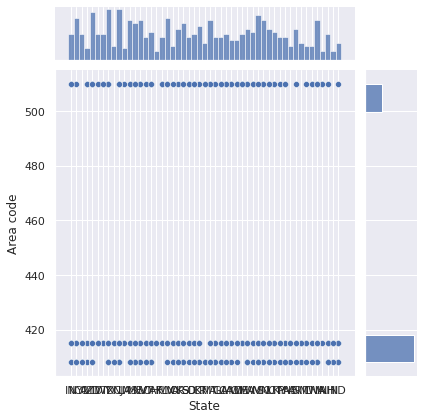

In [172]:
sns.jointplot(churned_df['State'],churned_df["Area code"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


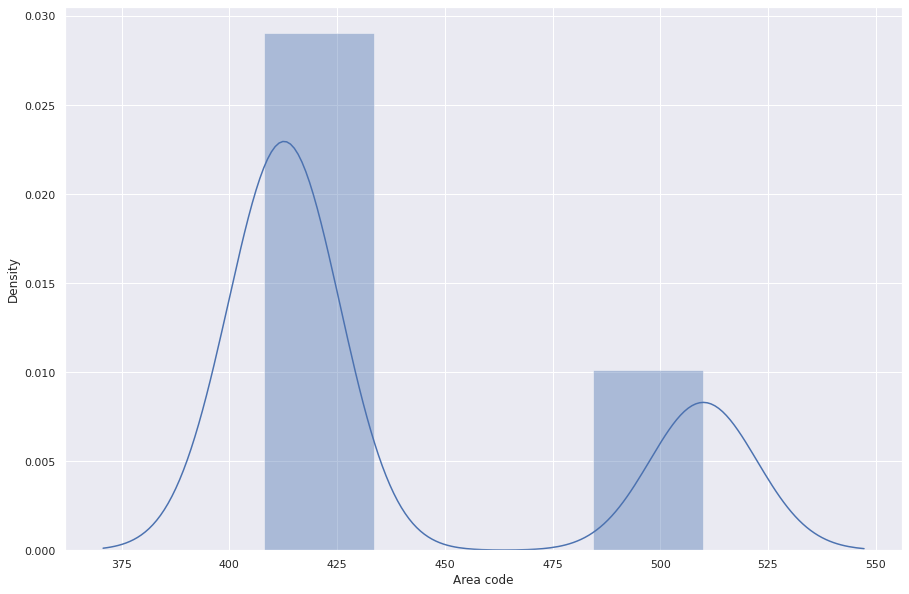

In [173]:
sns.distplot(churned_df["Area code"],hist=True)

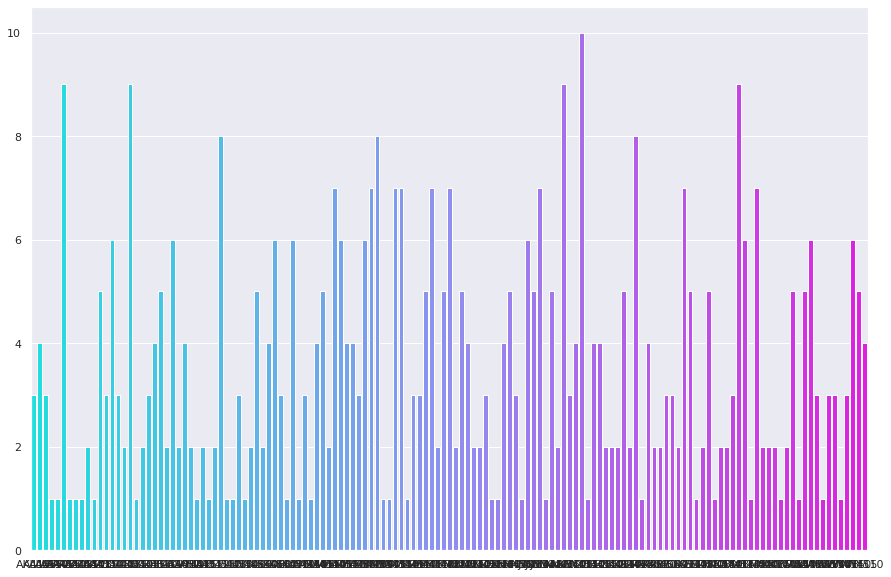

In [174]:
state,count = np.unique(churned_df["State + Arcode"],return_counts=True)
sns.barplot(x=state,y=count, palette = 'cool')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


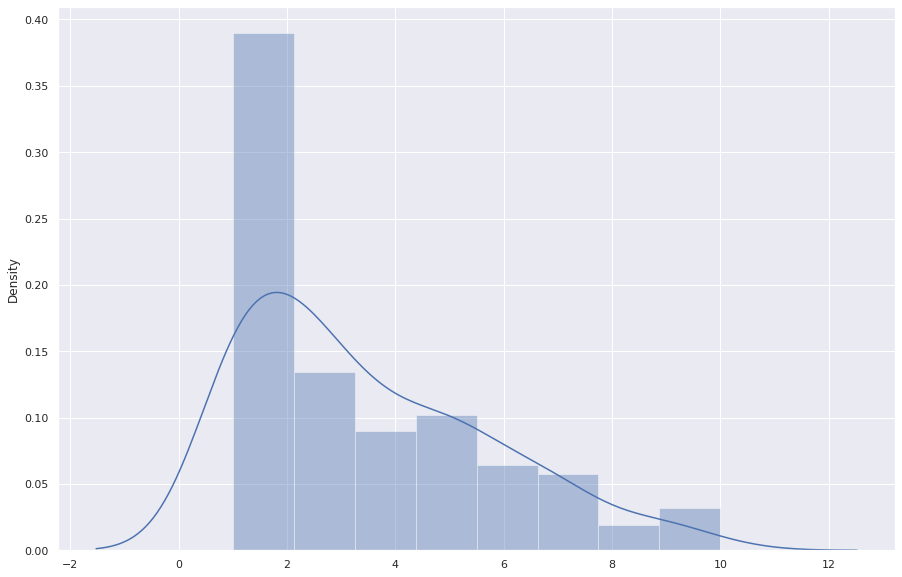

In [175]:
sns.distplot(count, hist = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


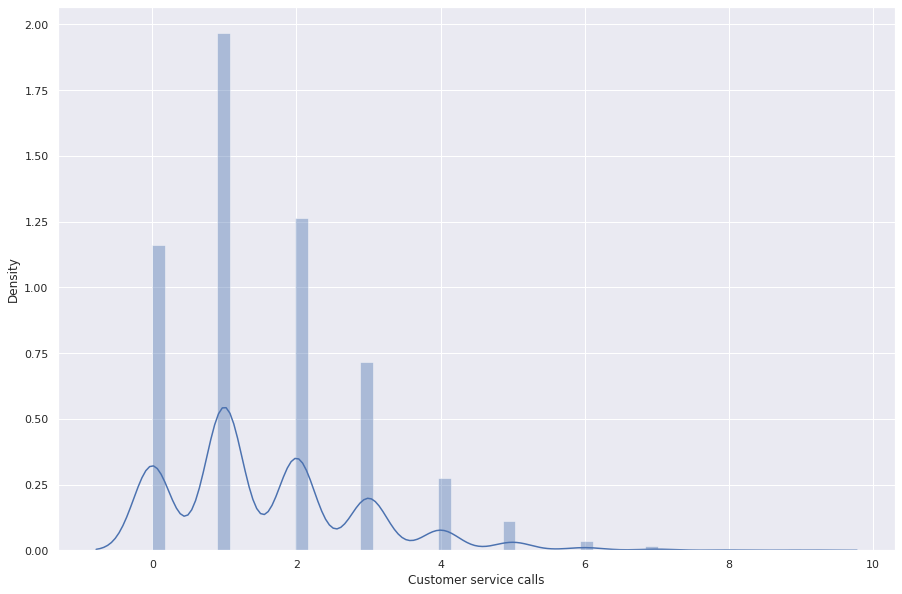

In [176]:
#Customer Service Calls
sns.distplot(df['Customer service calls'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


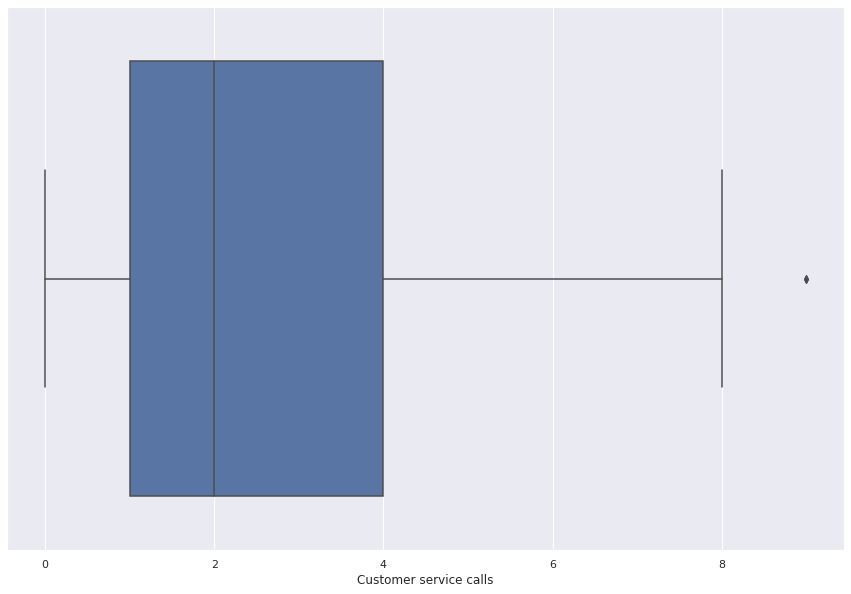

In [177]:
sns.boxplot(churned_df['Customer service calls'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


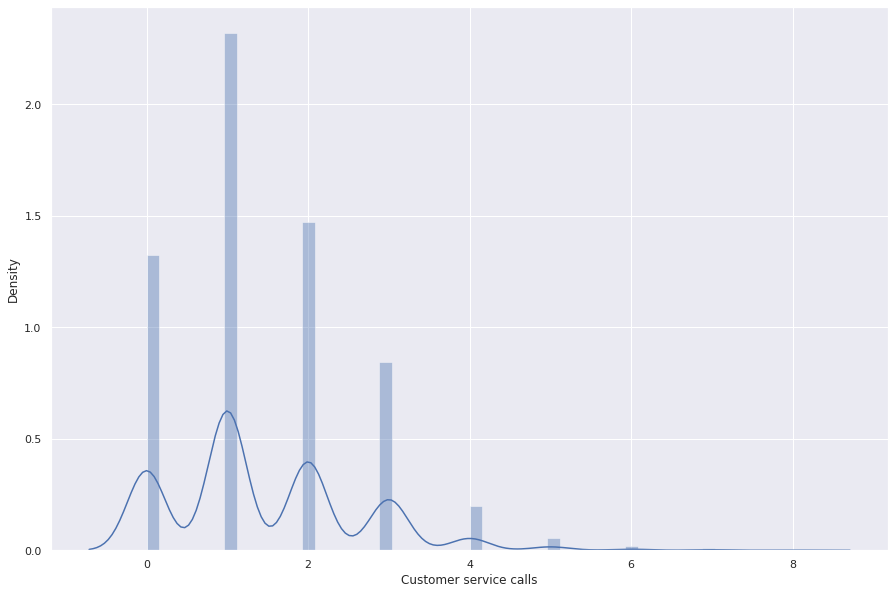

In [178]:
sns.distplot(retend_df['Customer service calls'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


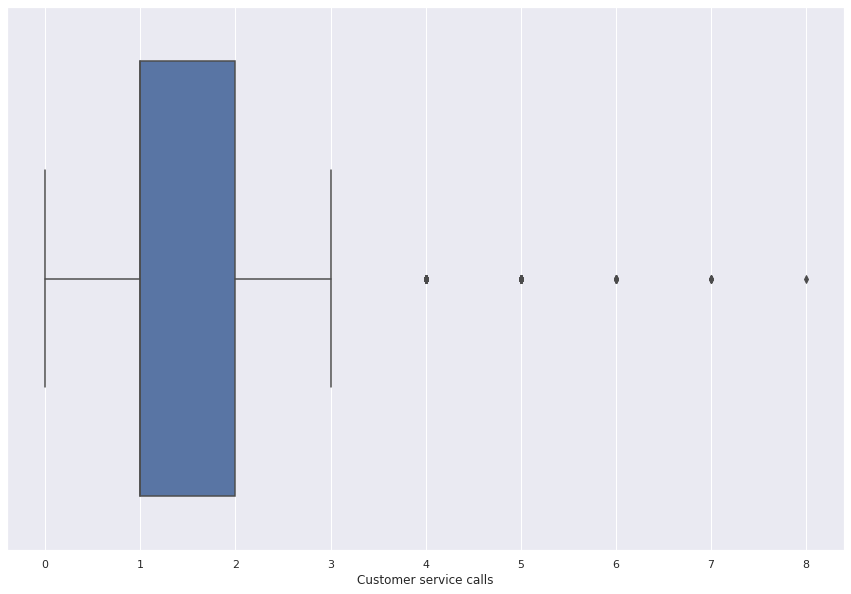

In [179]:
sns.boxplot(retend_df['Customer service calls'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


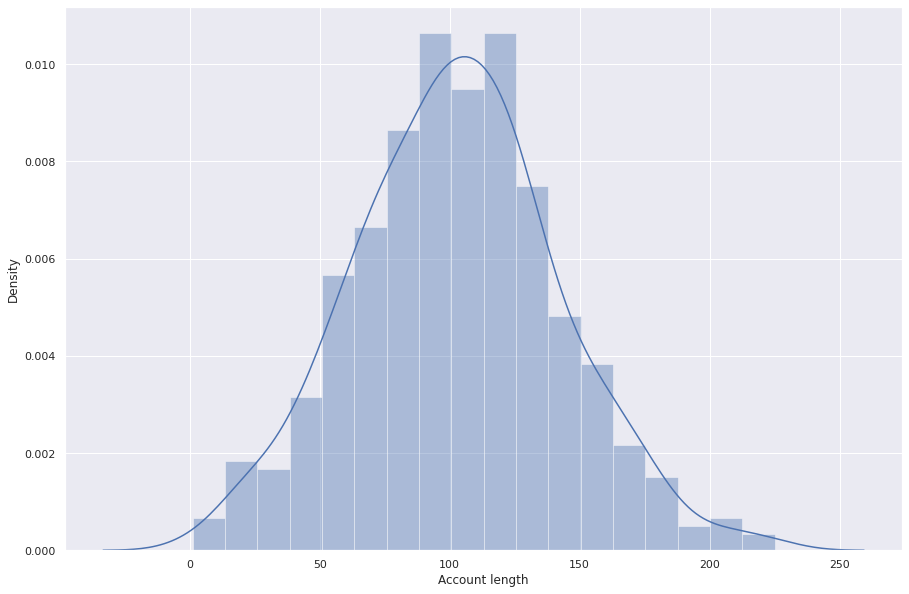

In [180]:
# No Of Days after Left Service
sns.distplot(churned_df['Account length'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


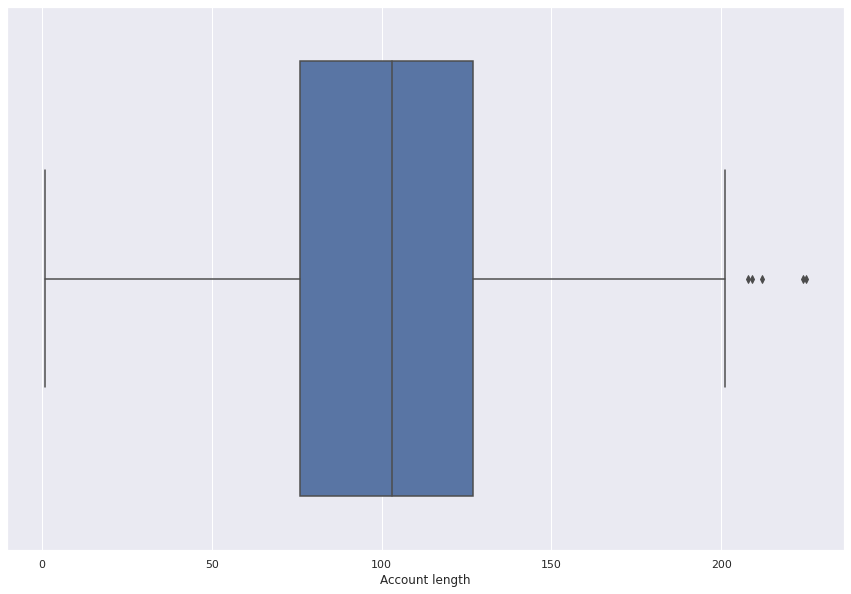

In [181]:
sns.boxplot(churned_df['Account length'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


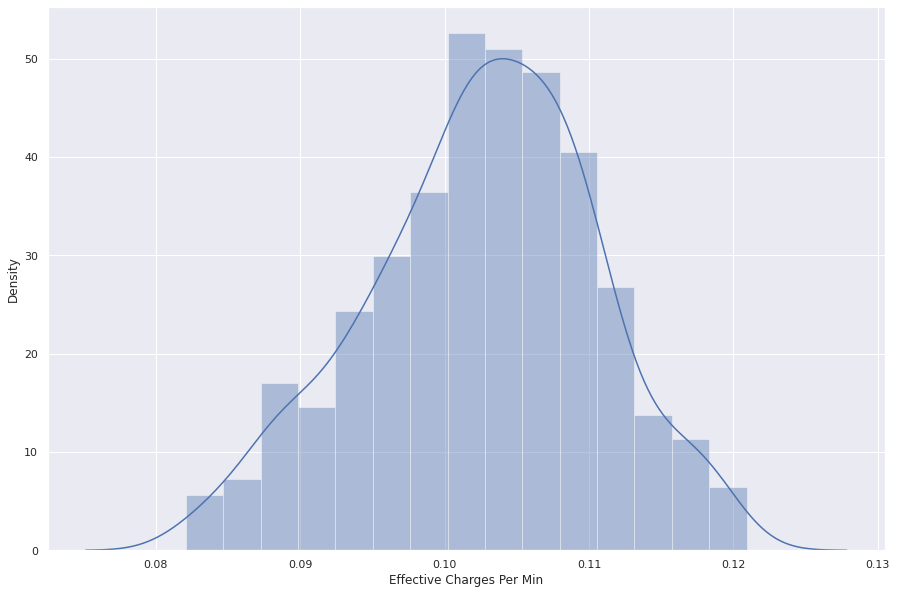

In [182]:
sns.distplot(churned_df[(churned_df['Effective Charges Per Min']>0.082)&(churned_df['Effective Charges Per Min']<0.122)]['Effective Charges Per Min'],hist=True)

In [183]:
len(churned_df[(churned_df['Effective Charges Per Min']>0.082)&(churned_df['Effective Charges Per Min']<0.122)])

477

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


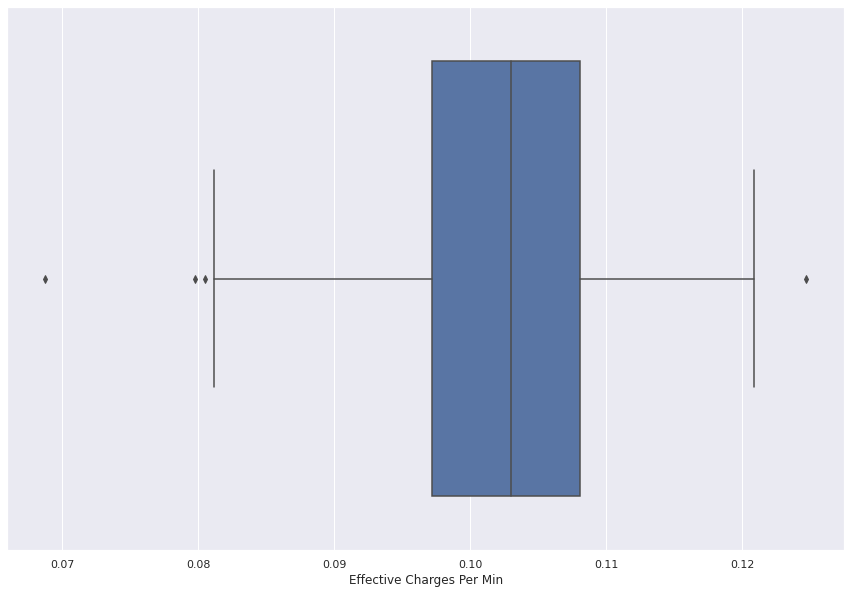

In [184]:
sns.boxplot(churned_df['Effective Charges Per Min'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


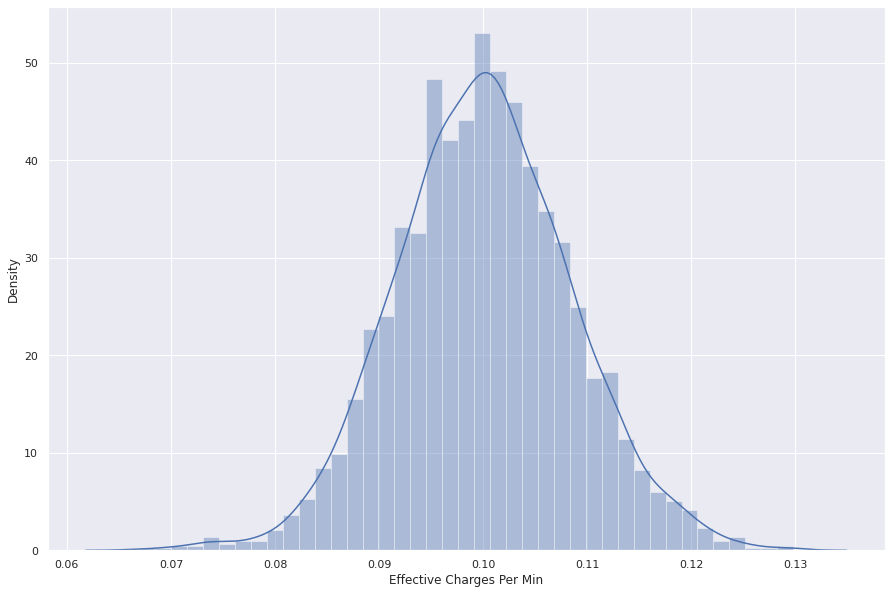

In [185]:
sns.distplot(retend_df['Effective Charges Per Min'],hist=True)

Checking the unique areacodes for Churned DF

In [186]:
bad_area = churned_df['Area code'].unique()
print(bad_area)

[415 408 510]


In [187]:
df['Area code'].unique()

array([415, 408, 510])

filter the whole df with these areacodes.

In [188]:
# ar_code_df = df[df['Area code'].isin(bad_area)]

In [189]:
# ar_code_df

In [190]:
calls_df = churned_df[['Total day calls','Total eve calls','Total night calls','Total intl calls']]

In [191]:
calls_df

,Total day calls,Total eve calls,Total night calls,Total intl calls
10,137,83,111,6
15,67,97,128,9
21,89,121,64,6
33,118,119,90,3
41,85,107,78,15
...,...,...,...,...
3301,113,90,103,4
3304,114,140,80,5
3320,101,77,133,4
3322,105,122,72,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

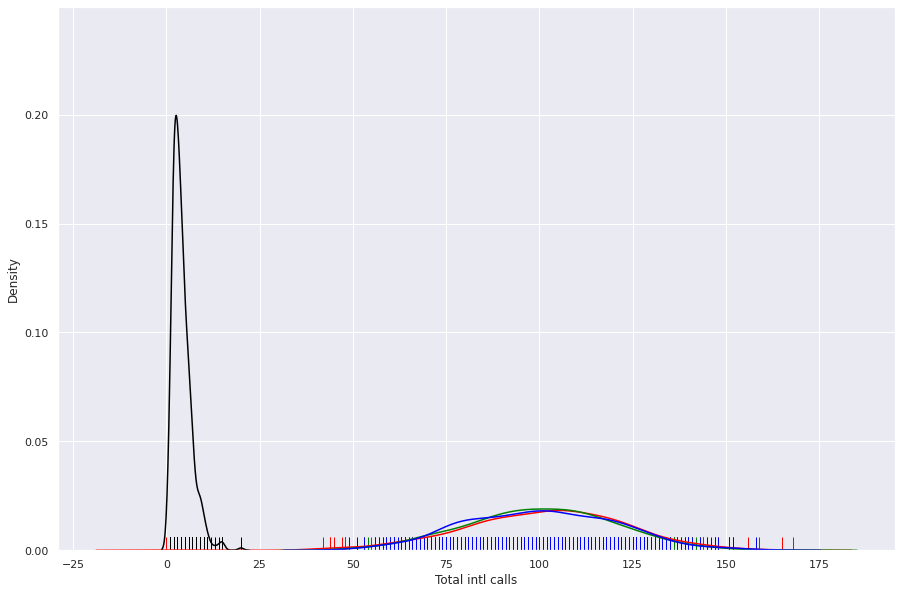

In [192]:
sns.distplot(calls_df['Total day calls'], rug=True, hist = False,color='red')
sns.distplot(calls_df['Total eve calls'], rug=True, hist = False,color='green')
sns.distplot(calls_df['Total night calls'],rug=True, hist = False,color='blue')
sns.distplot(calls_df['Total intl calls'], rug=True,hist = False,color='black')

In [193]:
# g = sns.FacetGrid(df, col='cols', hue="target", palette="Set1")
# g = (g.map(sns.distplot, "vals", hist=False, rug=True))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

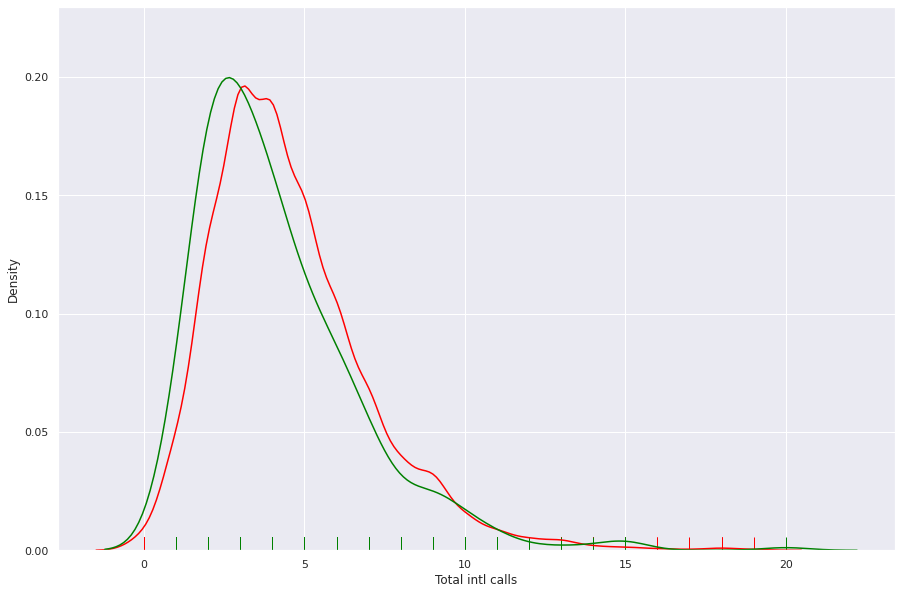

In [194]:
sns.distplot(retend_df['Total intl calls'], rug=True, hist = False,color = "red")
sns.distplot(calls_df['Total intl calls'], rug=True, hist = False,color = "green")

Although the total international calls for churned and retended df are almost same, so we cannot consider international calls as a feature resulting for churn.

In [195]:
filtered_df = df.drop('Total intl calls',axis = 1)

In [196]:
filtered_df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,2.7,1,False,KS415,0.105354,303


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

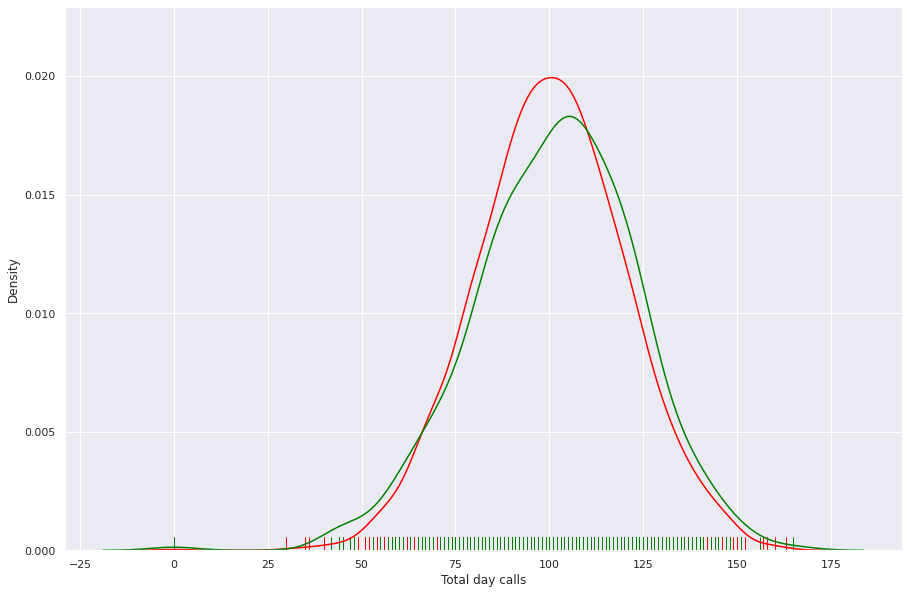

In [197]:
sns.distplot(retend_df['Total day calls'], rug=True, hist = False,color = "red")
sns.distplot(calls_df['Total day calls'], rug=True, hist = False,color = "green")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

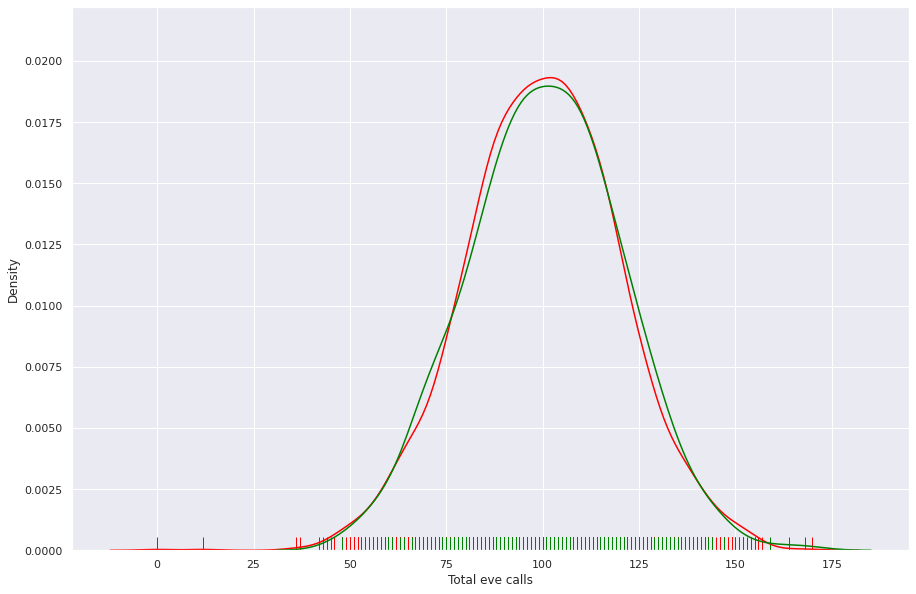

In [198]:
sns.distplot(retend_df['Total eve calls'], rug=True, hist = False,color = "red")
sns.distplot(calls_df['Total eve calls'], rug=True, hist = False,color = "green")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

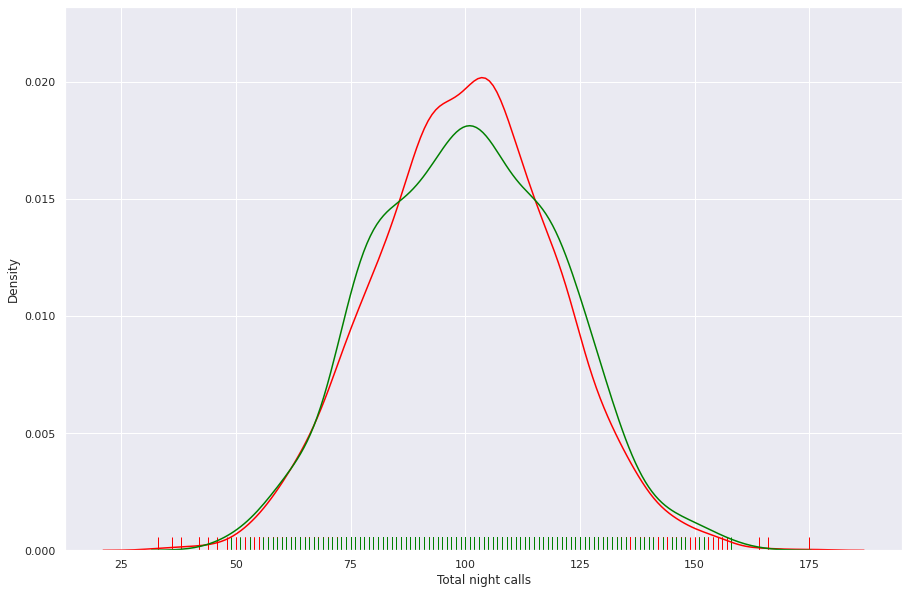

In [199]:
sns.distplot(retend_df['Total night calls'], rug=True, hist = False,color = "red")
sns.distplot(calls_df['Total night calls'], rug=True, hist = False,color = "green")

We can do the wsame with other type of calls

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

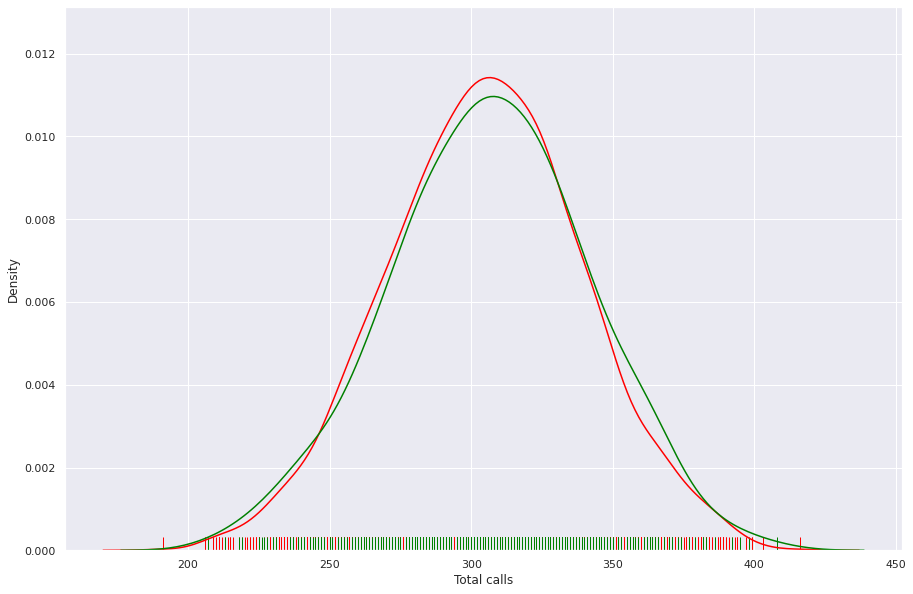

In [200]:
sns.distplot(retend_df['Total calls'], rug=True, hist = False,color = "red")
sns.distplot(churned_df['Total calls'], rug=True, hist = False,color = "green")

Since we see asymmetric curves in plots for night calls and day calls, we can filter our df with evening calls as well

In [201]:
filtered_df = df.drop('Total eve calls',axis = 1)

In [202]:
filtered_df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415,0.105354,303


We can now go ahead and plot boxplots for daycalls and night calls

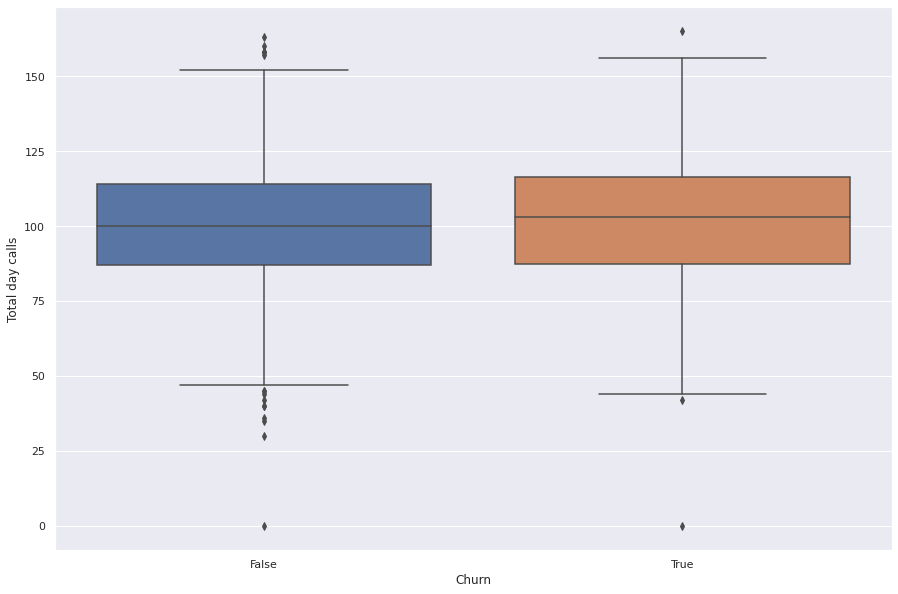

In [203]:
sns.boxplot(x = 'Churn', y = "Total day calls", data = filtered_df)

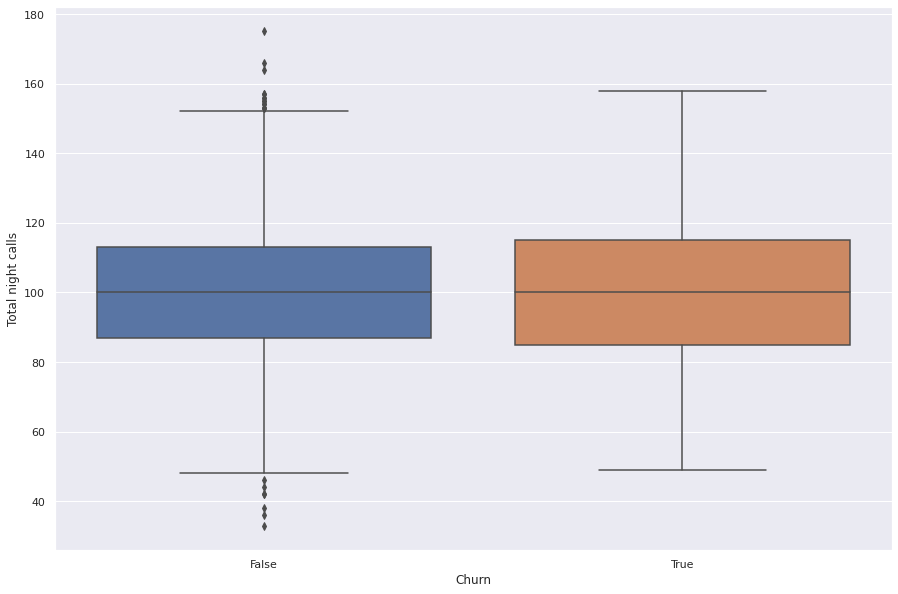

In [204]:
sns.boxplot(x = 'Churn', y = "Total night calls", data = filtered_df)

We are not concerned with Te false part outliers, we only consider the true part outliers.
Therefore, we can go ahead and remove outlier rows from day calls

In [205]:
q1=np.percentile(filtered_df['Total day calls'],25)
q3=np.percentile(filtered_df['Total day calls'],75)
iqr = q3-q1
low =  q1-1.5*iqr
high = q3 + 1.5*iqr
filtered_df = filtered_df[(filtered_df['Total day calls']>low)&(filtered_df['Total day calls']<high)]

In [206]:
len(filtered_df)

3310

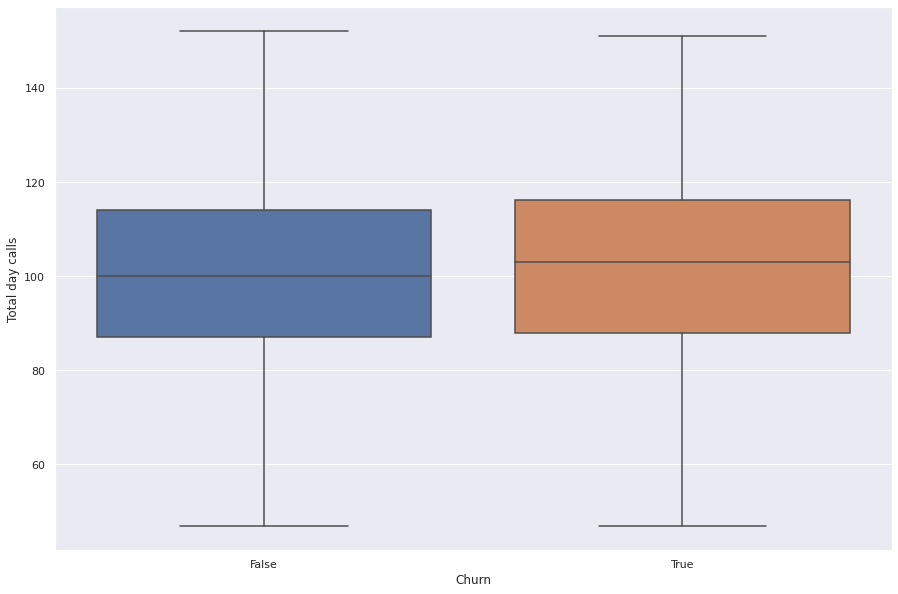

In [207]:
sns.boxplot(x = 'Churn', y = "Total day calls", data = filtered_df)

We also have to clear out liers from the effective charge

In [208]:
q1=np.percentile(filtered_df['Effective Charges Per Min'],25)
q3=np.percentile(filtered_df['Effective Charges Per Min'],75)
iqr = q3-q1
low =  q1-1.5*iqr
high = q3 + 1.5*iqr
filtered_df = filtered_df[(filtered_df['Effective Charges Per Min']>low)&(filtered_df['Effective Charges Per Min']<high)]

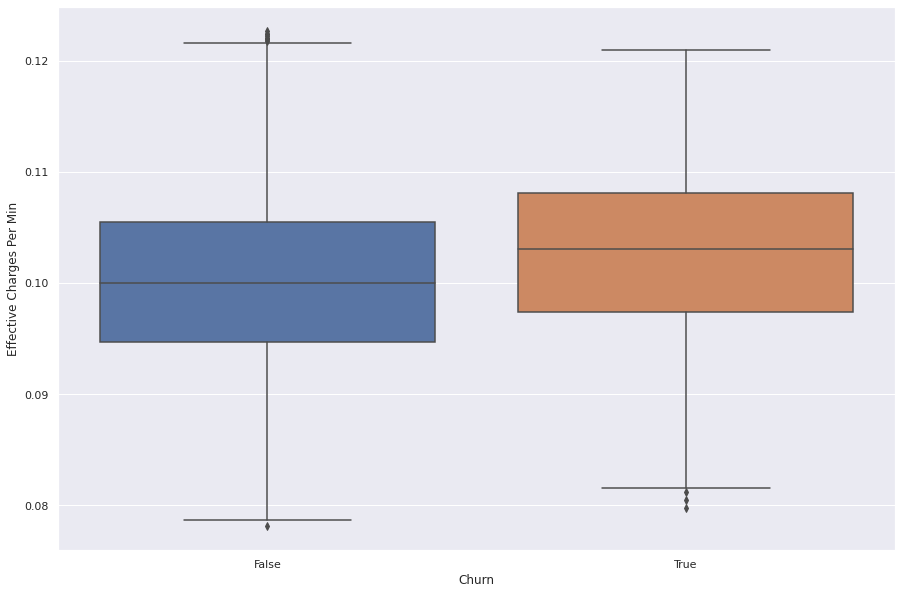

In [209]:
sns.boxplot(x = 'Churn', y = "Effective Charges Per Min", data = filtered_df)

we still have outliers but those won't affect the mean much since they are close to min

Converting Boolean data to numerical forms. to plot in graphs

In [210]:
filtered_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,False,KS415,0.105354,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,False,OH415,0.094754,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,False,NJ415,0.115480,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,False,OH408,0.118272,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,False,OK415,0.101738,359


In [211]:
def conv(i):
  if i == "Yes":
    return 1
  return 0

In [212]:
def convtf(i):
  if i:
    return 1
  return 0

In [213]:
filtered_df['International plan']=filtered_df['International plan'].apply(conv)
filtered_df['Voice mail plan']=filtered_df['Voice mail plan'].apply(conv)

In [214]:
filtered_df['Churn']=filtered_df['Churn'].apply(convtf)

In [215]:
filtered_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,359


In [216]:
pd.crosstab(filtered_df['State'],filtered_df["Churn"])

Churn,0,1
State,,
AK,48,3
AL,72,8
AR,44,11
AZ,59,4
CA,24,9
CO,56,9
CT,60,12
DC,48,5
DE,52,8


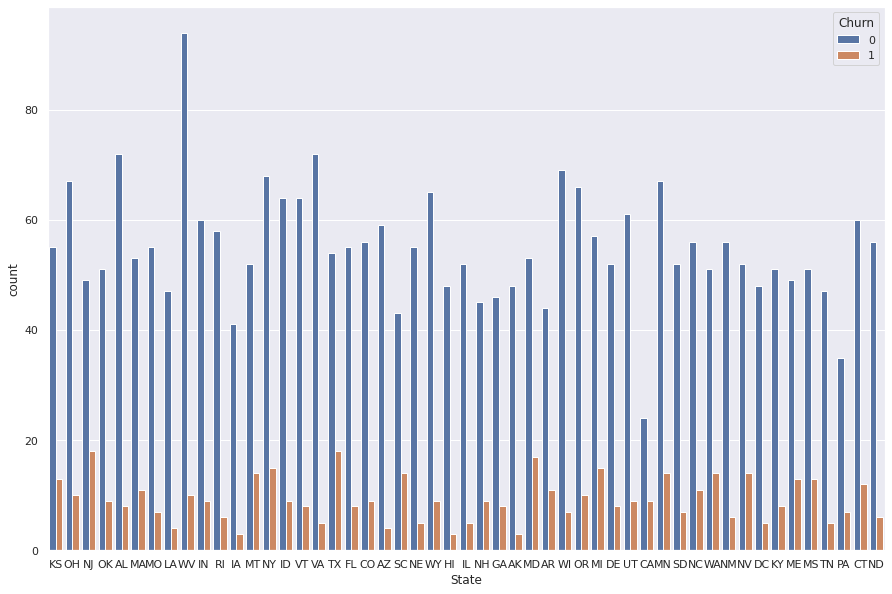

In [217]:
sns.countplot(x='State', hue = 'Churn', data= filtered_df)

Number of states clearly does not define whether or not people leave based on a network in particular state

In [218]:
pd.crosstab(filtered_df['International plan'],filtered_df["Churn"])

Churn,0,1
International plan,,
0,2622,340
1,183,135


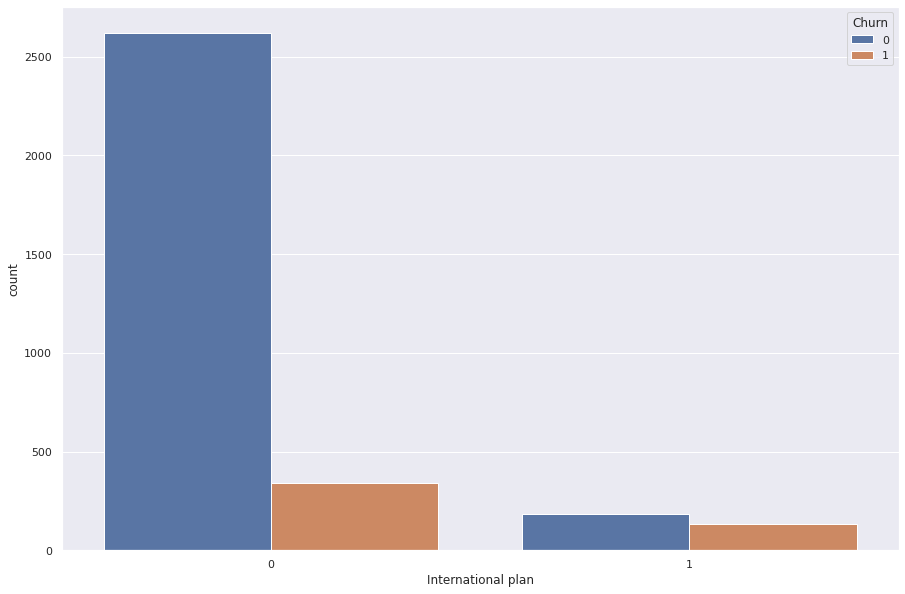

In [219]:
sns.countplot(x='International plan', hue = 'Churn', data= filtered_df)

People not having international plan tend to stay and people having international plan tend to leave (Ratio of Churn  = True and Churn = False) low

In [220]:
pd.crosstab(filtered_df['Voice mail plan'],filtered_df["Churn"])

Churn,0,1
Voice mail plan,,
0,1982,395
1,823,80


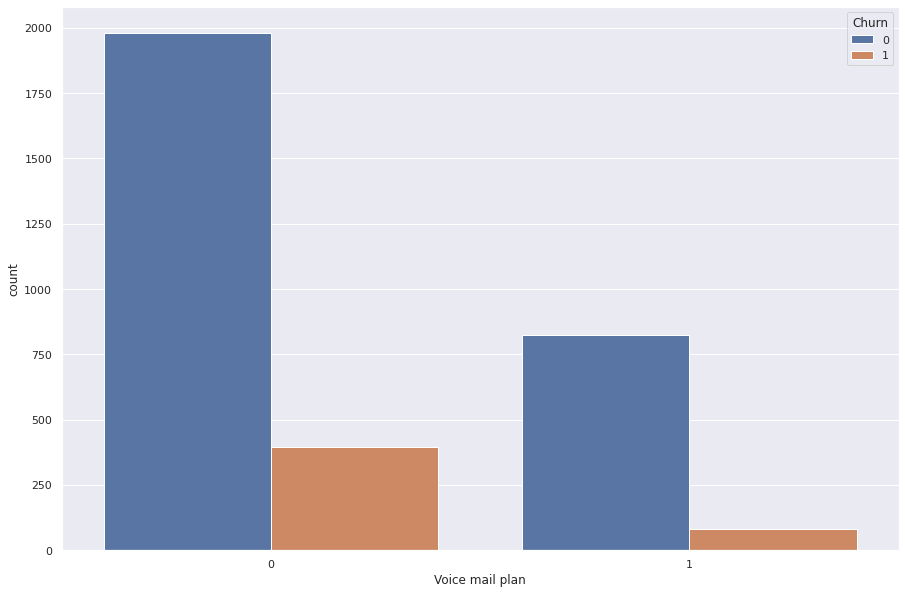

In [221]:
sns.countplot(x='Voice mail plan', hue = 'Churn', data= filtered_df)

People whether having voice mail plan or not  tend to stay (Ratio of Churn  = True and Churn = False) is high

In [222]:
pd.crosstab(filtered_df['Area code'],filtered_df["Churn"])

Churn,0,1
Area code,,
408,705,119
415,1393,231
510,707,125


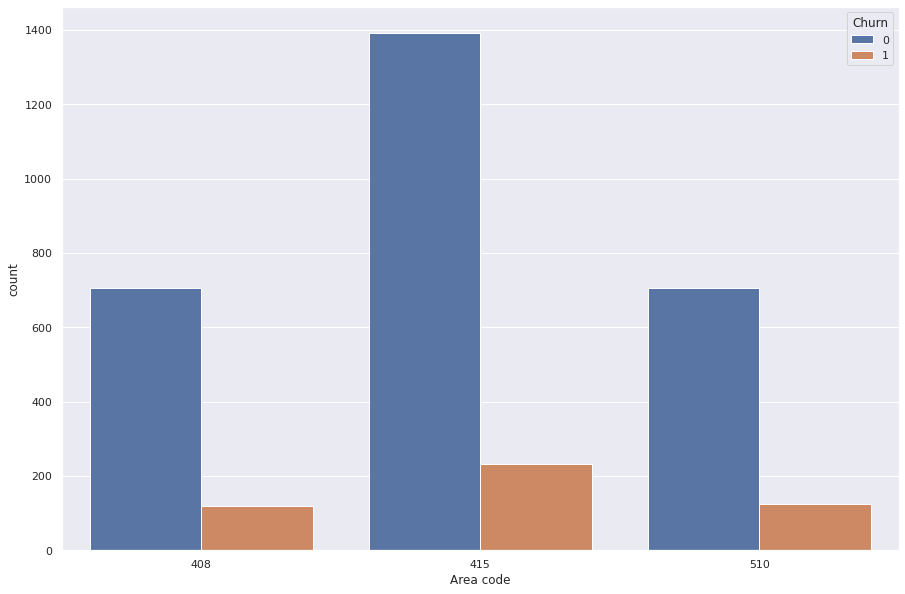

In [223]:
sns.countplot(x='Area code', hue = 'Churn', data= filtered_df)

Since people from different area codes have high ratios of churn and non churn therefor state is not a feature contributing to finding the churn

In [224]:
pd.crosstab(filtered_df['Customer service calls'],filtered_df["Churn"])

Churn,0,1
Customer service calls,,
0,597,92
1,1038,118
2,665,86
3,377,43
4,89,75
5,26,39
6,8,14
7,4,5
8,1,1


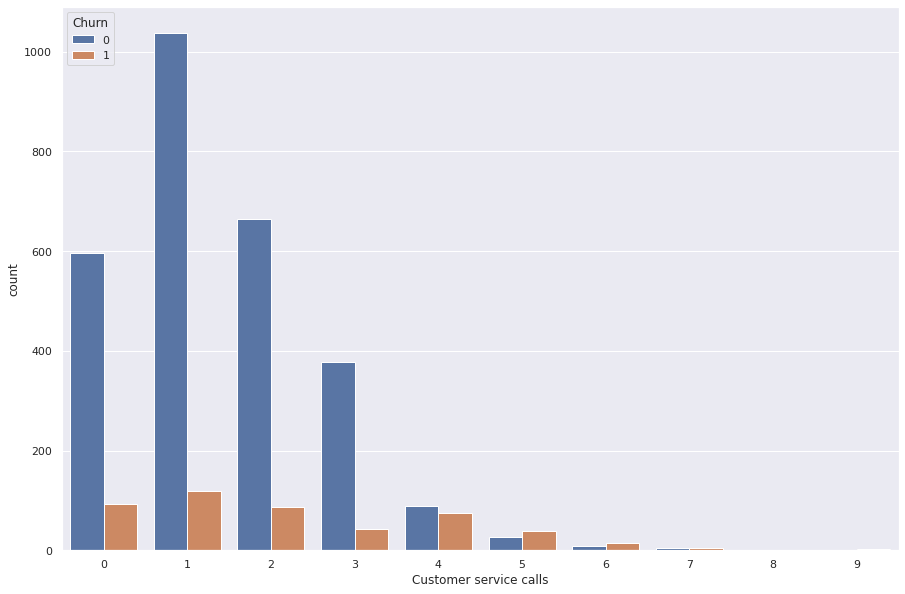

In [225]:
sns.countplot(x='Customer service calls', hue = 'Churn', data= filtered_df)

Customer calls can be a factor affecting our Churn because after 4, there is a more customers leaving the netowrk than the number of customers staying

In [226]:
#Day 4

In [227]:
filtered_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,359


In [228]:
#let's see where the information for international plan data and customer service call data in more details

In [229]:
sc_df = pd.crosstab(filtered_df['Customer service calls'],filtered_df["Churn"])
sc_df['Percentage_Churn'] = sc_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

In [230]:
sc_df

Churn,0,1,Percentage_Churn
Customer service calls,,,
0,597,92,13.352685
1,1038,118,10.207612
2,665,86,11.451398
3,377,43,10.238095
4,89,75,45.731707
5,26,39,60.000000
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


In [231]:
#there is a high jump number of calls => 4, bad customer service

In [232]:
def badcalls(x):
  if x>3:
    return 1
  return 0

In [233]:
filtered_df["Bad Service"] = filtered_df['Customer service calls'].apply(badcalls)

In [234]:
filtered_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls,Bad Service
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,303,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,332,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,333,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,255,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,359,0


In [235]:
bs_df = pd.crosstab(filtered_df['Bad Service'],filtered_df["Churn"])
bs_df['Percentage_Churn'] = bs_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

In [236]:
bs_df

Churn,0,1,Percentage_Churn
Bad Service,,,
0,2677,339,11.240053
1,128,136,51.515152


In [237]:
#we have reliable data for if the customer has bad service, the churn rate will be more

In [238]:
# checking international plan

In [239]:
ip_df = pd.crosstab(filtered_df['International plan'],filtered_df["Churn"])
ip_df['Percentage_Churn'] = ip_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

In [240]:
ip_df

Churn,0,1,Percentage_Churn
International plan,,,
0,2622,340,11.478731
1,183,135,42.452830


In [241]:
# we can make a composite column for this new bad service and 

In [242]:
filtered_df['bs+intcall']= filtered_df['Bad Service']+filtered_df['International plan']

In [243]:
filtered_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State + Arcode,Effective Charges Per Min,Total calls,Bad Service,bs+intcall
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,303,0,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,332,0,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,333,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,255,0,1
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,359,0,1


In [244]:
bsip_df = pd.crosstab(filtered_df['bs+intcall'],filtered_df["Churn"])
bsip_df['Percentage_Churn'] = bsip_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

In [245]:
bsip_df

Churn,0,1,Percentage_Churn
bs+intcall,,,
0,2503,223,8.180484
1,293,233,44.296578
2,9,19,67.857143


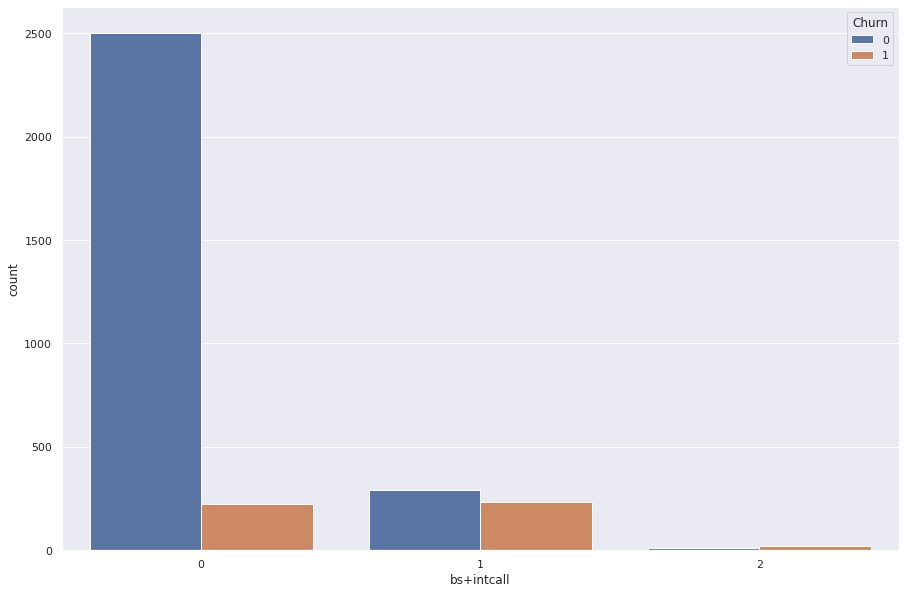

In [246]:
sns.countplot(x='bs+intcall', hue = 'Churn', data= filtered_df)

0: neither international plan nor bad service<br>
1: either international plan or bad service<br>
3: both international plan and bad service<br>

international plan and customer service calls directly affect the churn